In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv
/kaggle/input/time-series-starter-dataset/Month_Value_1.csv
/kaggle/input/everything-you-can-do-with-a-time-series/__results__.html
/kaggle/input/everything-you-can-do-with-a-time-series/__output__.json
/kaggle/input/everything-you-can-do-with-a-time-series/stocks.png
/kaggle/input/everything-you-can-do-with-a-time-series/custom.css
/kaggle/input/everything-you-can-do-with-a-time-series/__results___files/__results___65_0.png
/kaggle/input/everything-you-can-do-with-a-time-series/__results___files/__results___55_1.png
/kaggle/input/everything-you-can-do-with-a-time-series/__results___files/__results___144_0.png
/kaggle/input/everything-you-can-do-with-a-time-series/__results___files/__results___50_1.png
/kaggle/input/everything-you-can-do-with-a-time-series/__results___files/__results___76_0.png
/kaggle/input/everything-you-can-do-with-a-time-series/__results___files/__results___89_1.png
/kaggle/input/everything-you-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import stat
import sklearn
import statsmodels
url = '/kaggle/input/time-series-starter-dataset/Month_Value_1.csv'
df=pd.read_csv(url)
df.head()
df.info()
df.index
df.columns
df.values
df.tail()
df.dropna(axis=0,inplace=True)
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    64 non-null     object 
 1   Revenue                           

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [3]:
sales=df[['Period','Sales_quantity']]
sales.head()
sales['Period']=pd.to_datetime(sales['Period'])
sales.head()
sales.info()
sales.set_index('Period')
sales.sort_index()

sales.head()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Period          64 non-null     datetime64[ns]
 1   Sales_quantity  64 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


/tmp/ipykernel_19/1703614200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Period']=pd.to_datetime(sales['Period'])


,Period,Sales_quantity
0,2015-01-01,12729.0
1,2015-01-02,11636.0
2,2015-01-03,15922.0
3,2015-01-04,15227.0
4,2015-01-05,8620.0


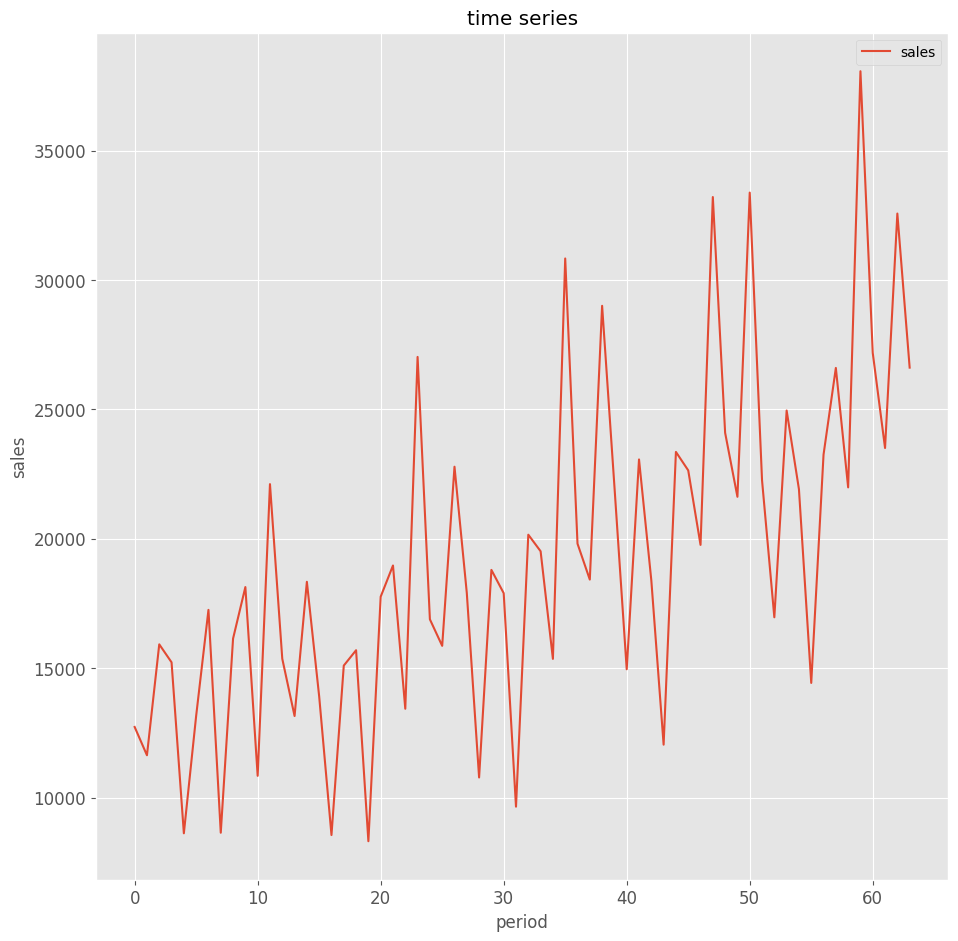

In [4]:

plt.style.use('ggplot')
plt.figure(figsize=(11,11))
plt.savefig('timeseries.pdf')
plt.title('time series')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(sales.Sales_quantity,label='sales')
plt.xlabel('period')
plt.ylabel('sales')
#plt.xlim(0)
#plt.ylim()
plt.legend()
plt.show()


In [5]:
rolmean=sales['Sales_quantity'].rolling(5).mean()
rolstd=sales['Sales_quantity'].rolling(5).std()

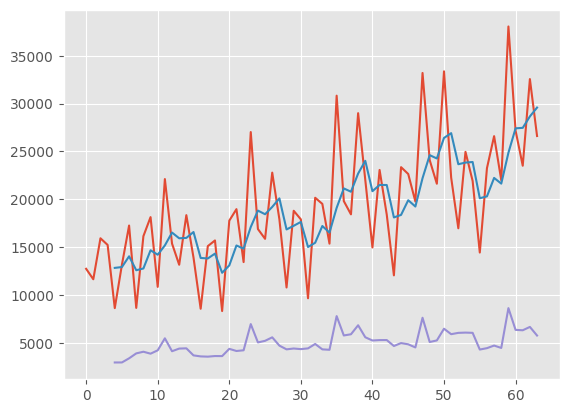

In [6]:
plt.plot(sales.Sales_quantity)
plt.plot(rolmean)
plt.plot(rolstd)

In [7]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(sales['Sales_quantity'])
print(adft)

(1.1570562060945373, 0.9956753282590142, 11, 52, {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}, 936.0262923313306)


In [8]:
def stationarity_test(time_series):
    from statsmodels.tsa.stattools import adfuller
    adft=adfuller(time_series)
    result=pd.Series(adft[0:4],index=['test stats','pvalue','no. of lag','no.of observation'])
    print(result)

In [9]:
stationarity_test(sales['Sales_quantity'])

test stats            1.157056
pvalue                0.995675
no. of lag           11.000000
no.of observation    52.000000
dtype: float64


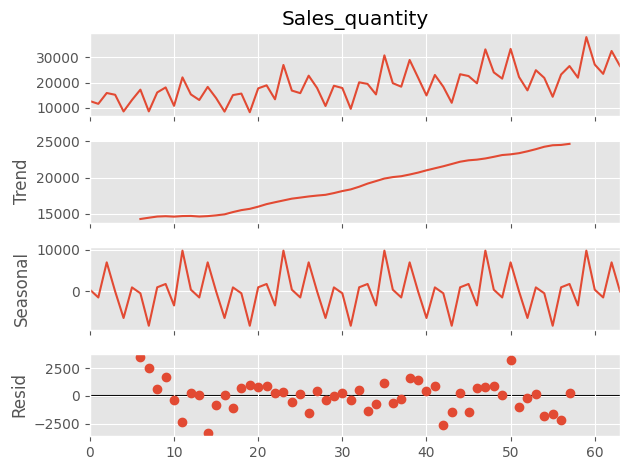

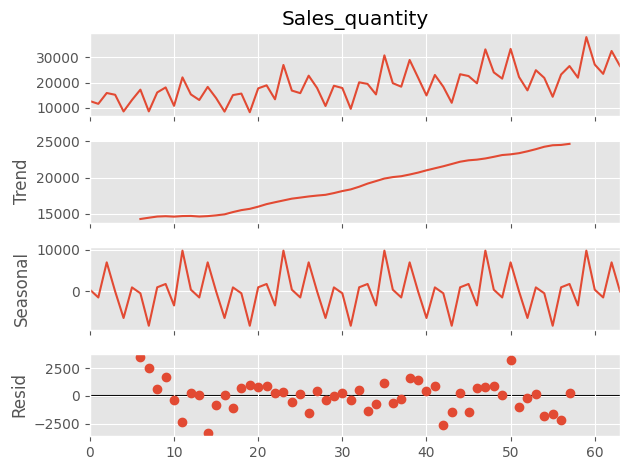

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(sales['Sales_quantity'],period=12).plot()